 # Problema de la Mochila
 
 El problema de la mochila surge en areas de investigacion de operaciones en las cuales se requiere alojar un numero de items con el maximo valor bajo ciertas restricciones. Si hacemos $X=\{x_1,\ldots,x_n\}$ un conjunto de items, con $x_i \in \{0,1\}$ siendo una variable binaria que indica la presencia del item $i$, $W=\{w_1,\ldots,w_n\}$ los pesos de los items y $V=\{v_1,\ldots,v_n\}$ el valor asociado a cada uno de los items, el problema de optimizacion puede ser escrito como:
 
 $F(X)=\operatorname{max}\sum_i x_i*v_i$
  
  Dado 
  
 $\sum_i x_i*w_i < W_{max}$
  

In [1]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [2]:
import random
import numpy as np

n=5
W = [random.randint(20, 1000) for _ in range(n)]  # peso
V  = [random.randint(10, 800) for _ in range(n)] # valor
W_max=1000
print('pesos : ',W)
print('valores : ',V)
print('------------------------------')
for i,p in enumerate(powerset(range(n))):
    print('Mochila {0}, items : {1}, valor : {2}, peso : {3}'.format(
            i,p,np.sum([V[i] for i in p]),np.sum([W[i] for i in p])))

pesos :  [769, 382, 875, 479, 877]
valores :  [758, 74, 549, 289, 143]
------------------------------
Mochila 0, items : (), valor : 0.0, peso : 0.0
Mochila 1, items : (0,), valor : 758, peso : 769
Mochila 2, items : (1,), valor : 74, peso : 382
Mochila 3, items : (2,), valor : 549, peso : 875
Mochila 4, items : (3,), valor : 289, peso : 479
Mochila 5, items : (4,), valor : 143, peso : 877
Mochila 6, items : (0, 1), valor : 832, peso : 1151
Mochila 7, items : (0, 2), valor : 1307, peso : 1644
Mochila 8, items : (0, 3), valor : 1047, peso : 1248
Mochila 9, items : (0, 4), valor : 901, peso : 1646
Mochila 10, items : (1, 2), valor : 623, peso : 1257
Mochila 11, items : (1, 3), valor : 363, peso : 861
Mochila 12, items : (1, 4), valor : 217, peso : 1259
Mochila 13, items : (2, 3), valor : 838, peso : 1354
Mochila 14, items : (2, 4), valor : 692, peso : 1752
Mochila 15, items : (3, 4), valor : 432, peso : 1356
Mochila 16, items : (0, 1, 2), valor : 1381, peso : 2026
Mochila 17, items : (0,

In [3]:
# A Dynamic Programming based Python Program for 0-1 Knapsack problem 
# Returns the maximum value that can be put in a knapsack of capacity W 
def knapsack(W_max, W, V, n): 
    C = [[0 for x in range(W_max+1)] for x in range(n+1)] 
    # Build table in bottom up manner 
    for i in range(n+1): 
        for w in range(W_max+1): 
            if i==0 or w==0: 
                C[i][w] = 0
            elif W[i-1] <= w: 
                C[i][w] = max(V[i-1] + C[i-1][w-W[i-1]],  C[i-1][w]) 
            else: 
                C[i][w] = C[i-1][w] 
  
    return C 

In [4]:
def knapsack_greedy(W, wt, val, n):
    # elements in the knapsack (the order must be consequent)
    v_in_knapsack = []
    w_in_knapsack = []
    # current weight of all the elements put in the knapsack so far
    weight_in_knapsack = 0
    # sort elements by purity in descendant order
    for v_i,w_i in sorted(zip(val,wt),key=lambda x:x[0]/x[1] if x[1]!=0 else x[0], reverse=True):
        if w_i + weight_in_knapsack <= W:  # if I can carry it,
            v_in_knapsack.append(v_i)
            w_in_knapsack.append(w_i)
            weight_in_knapsack += w_i

    return v_in_knapsack, w_in_knapsack

In [5]:
# Example from Grokking Algorithms. p161
import numpy as np

values = [1500,3000,2000]
weights = [[1,4,3]]
capacities = [4]

C=knapsack(capacities[0],weights[0],values,len(values))

print(np.asarray(C))

[[   0    0    0    0    0]
 [   0 1500 1500 1500 1500]
 [   0 1500 1500 1500 3000]
 [   0 1500 1500 2000 3500]]


In [6]:
v_c,w_c=knapsack_greedy(capacities[0],weights[0],values,len(values))

print(v_c)
print(w_c)

[1500, 2000]
[1, 3]


In [7]:
# Example from https://developers.google.com/optimization/bin/knapsack

values = [
    360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147,
    78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28,
    87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276,
    312
]
weights = [[
    7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0,
    42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71,
    3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13
]]
capacities = [850]

C=knapsack(capacities[0],weights[0],values,len(values))
print('Total value = {0}'.format(C[-1][-1]))
print('Total weight = {0}'.format(len(C[0])-1))

Total value = 7534
Total weight = 850


In [8]:
import numpy as np

v_c,w_c=knapsack_greedy(capacities[0],weights[0],values,len(values))

print('Total value = ',np.sum(v_c))
print('Total weight = ',np.sum(w_c))

Total value =  7534
Total weight =  850


In [9]:
import numpy as np
import time
import pandas as pd

def run_experiment(W_max,method,num_items,n_samp=10):
    ellapsed_time={m:[] for m in method}
    s_n=[]
    for n in num_items:
        for j in range(n_samp):
            s_n.append(n)
            W = [random.randint(20, 1000) for _ in range(n)]  # peso
            V  = [random.randint(10, 800) for _ in range(n)] # valor
            for m in method:
                start=time.clock()
                eval(m+"(W_max,W,V,len(V))")
                end=time.clock()
                ellapsed_time[m].append(end-start)
    df_list=[]
    for m in method:
        df=pd.DataFrame({'n':s_n,
                         'time':ellapsed_time[m],
                         'method':[m]*len(ellapsed_time[m]),
                         'w_max':[W_max]*len(ellapsed_time[m])})
        df_list.append(df)
    df_average=pd.concat(df_list,axis=0)
    return df_average

In [37]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

W_max=1000
method=['knapsack_greedy','knapsack']
num_items=[100,200,300,1000]


df_1000=run_experiment(W_max,method,num_items,10)

W_max=100
df_100=run_experiment(W_max,method,num_items,10)



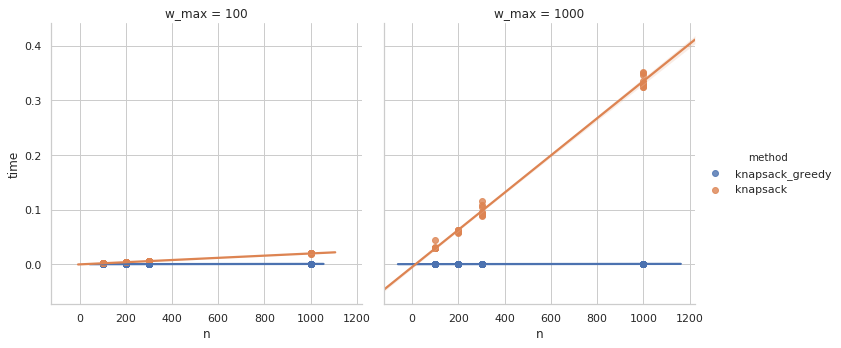

In [41]:
df_average=pd.concat([df_100,df_1000],axis=0)
sns.lmplot(x="n", y="time", hue="method",col="w_max", data=df_average)

In [33]:
df_dp=df_average[df_average["method"]=='knapsack']

In [34]:
df_dp.groupby(['w_max','n']).mean()

time
w_max n             
1000  100   0.028243
      200   0.057016
      300   0.088576
      1000  0.323699

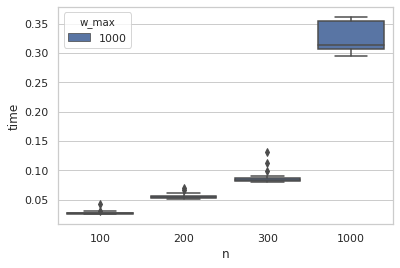

In [35]:
sns.boxplot(x="n", y="time",hue="w_max", data=df_dp)